<a href="https://colab.research.google.com/github/azragundogan/DSA210_Project/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Group means:
                 Entertainment_min  Communication_min  Total_Screen_min
Exam_day_or_not                                                        
0                         187.1875          63.000000        388.750000
1                         277.2500          48.166667        380.083333


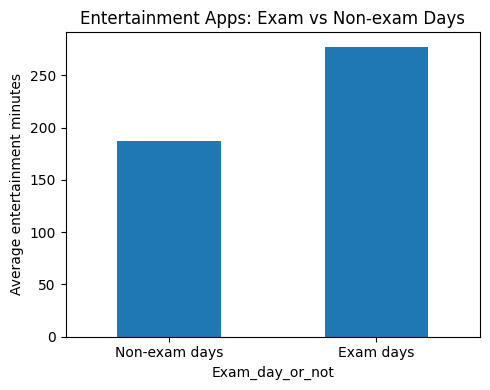

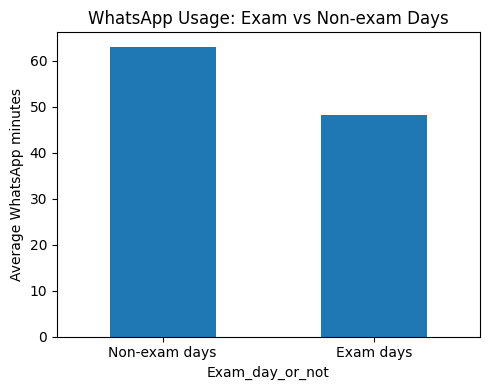

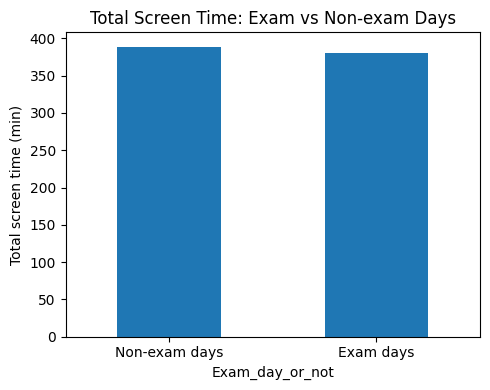


Entertainment t-stat: 1.0174187547238613 p-value: 0.3188682811898394
Communication t-stat: -1.468421767048802 p-value: 0.1480204496248223

Summary:
      Group  Entertainment_mean  Communication_mean  Total_screen_mean
0  Non-exam            187.1875           63.000000         388.750000
1      Exam            277.2500           48.166667         380.083333


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

try:
    get_ipython
    %matplotlib inline
except NameError:
    pass


df = pd.read_excel("DSA_210_Dataset.xlsx")


df.columns = df.columns.str.strip()




df["Entertainment_min"] = df["Instagram_min"] + df["TikTok_min"] + df["YouTube_min"]
df["Communication_min"] = df["WhatsApp_min"]

#df.head()
#df.info()
#df.describe()


group_means = df.groupby("Exam_day_or_not")[[
    "Entertainment_min",
    "Communication_min",
    "Total_Screen_min"
]].mean()

print("\nGroup means:")
print(group_means)

labels = ["Non-exam days", "Exam days"]


group_means["Entertainment_min"].plot(kind="bar", rot=0, figsize=(5,4))
plt.xticks([0,1], labels)
plt.ylabel("Average entertainment minutes")
plt.title("Entertainment Apps: Exam vs Non-exam Days")
plt.tight_layout()
plt.show()


group_means["Communication_min"].plot(kind="bar", rot=0, figsize=(5,4))
plt.xticks([0,1], labels)
plt.ylabel("Average WhatsApp minutes")
plt.title("WhatsApp Usage: Exam vs Non-exam Days")
plt.tight_layout()
plt.show()


group_means["Total_Screen_min"].plot(kind="bar", rot=0, figsize=(5,4))
plt.xticks([0,1], labels)
plt.ylabel("Total screen time (min)")
plt.title("Total Screen Time: Exam vs Non-exam Days")
plt.tight_layout()
plt.show()


ent_exam = df[df["Exam_day_or_not"] == 1]["Entertainment_min"]
ent_non  = df[df["Exam_day_or_not"] == 0]["Entertainment_min"]

com_exam = df[df["Exam_day_or_not"] == 1]["Communication_min"]
com_non  = df[df["Exam_day_or_not"] == 0]["Communication_min"]

t_ent, p_ent = ttest_ind(ent_exam, ent_non, equal_var=False)
t_com, p_com = ttest_ind(com_exam, com_non, equal_var=False)

print("\nEntertainment t-stat:", t_ent, "p-value:", p_ent)
print("Communication t-stat:", t_com, "p-value:", p_com)

summary = pd.DataFrame({
    "Group": ["Non-exam", "Exam"],
    "Entertainment_mean": [ent_non.mean(), ent_exam.mean()],
    "Communication_mean": [com_non.mean(), com_exam.mean()],
    "Total_screen_mean": [
        df[df["Exam_day_or_not"] == 0]["Total_Screen_min"].mean(),
        df[df["Exam_day_or_not"] == 1]["Total_Screen_min"].mean()
    ]
})

print("\nSummary:")
print(summary)
